268269-2427-MDC_PRESS_BLD_ART_ABP-125.csv:
sampling frequency is  0.1  Hz


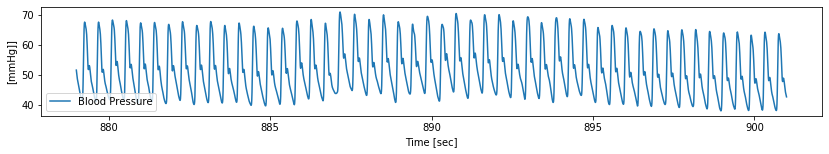

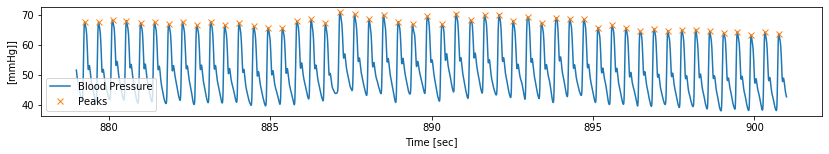

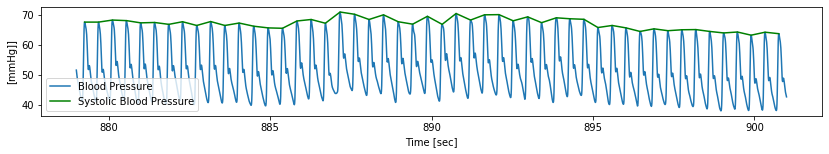

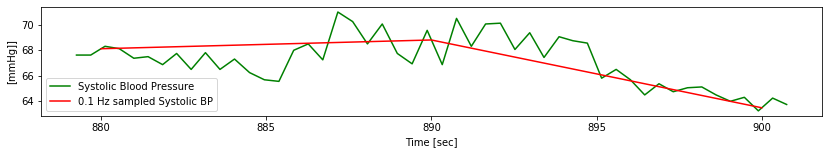

In [21]:
%run configuration.ipynb
MARGIN = 1
FIG_WIDTH = 14
FIG_HEIGHT = 2
def bp(start, end):
    if start != 0:
        start = start - MARGIN
    end = end + MARGIN
    bp = []
    for filename in os.listdir('samples'):
        if "MDC_PRESS_BLD_ART_ABP-125" in filename: 
            print(filename+':')
            print("sampling frequency is ", F," Hz")
            with open('samples/'+ filename, 'r') as f:
                reader = csv.reader(f)
                for row in reader:
                    bp.append((0.0625*float(row[1]))-40)

                bp_small = np.array(bp[start*125:end*125])
                peaks,_= find_peaks(bp_small, prominence=1, distance=42)
                peaks_sec = (peaks + start*125) * 0.008
                sys = bp_small[peaks]
                time = np.arange(start, end, 0.008)

                plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
                plt.plot(time,bp_small)
                plt.xlabel('Time [sec]')
                plt.ylabel('[mmHg]]')
                plt.legend(['Blood Pressure'], loc='lower left')
                plt.show()
                
                plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
                plt.plot(time,bp_small)
                plt.plot(peaks_sec, sys, "x")
                plt.legend(['Blood Pressure', 'Peaks'], loc='lower left')
                plt.xlabel('Time [sec]')
                plt.ylabel('[mmHg]]')
                plt.show()
                
                plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
                plt.plot(time,bp_small)
                plt.plot(peaks_sec,sys, color='g') 
                plt.legend(['Blood Pressure', 'Systolic Blood Pressure'], loc='lower left')
                plt.xlabel('Time [sec]')
                plt.ylabel('[mmHg]]')
                plt.show()
                
                sys_interp_func = interp1d(peaks_sec, sys)
                time1 = np.arange(start + MARGIN, end - MARGIN + 1/F, 1/F)
                
                plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
                plt.plot()
                plt.plot()
                plt.plot(peaks_sec,sys, color='g') 
                plt.plot(time1,sys_interp_func(time1), color='r')
                plt.legend(['Systolic Blood Pressure', '0.1 Hz sampled Systolic BP', 'regressed2'], loc='lower left')
                plt.xlabel('Time [sec]')
                plt.ylabel('[mmHg]]')
                plt.show()
                
                bp = []

                
                #return time, sys_interp_func(time)
            
for i in [44]:
    bp(i*20, (1+i)*20)



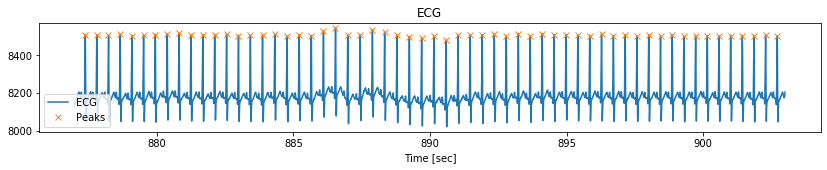

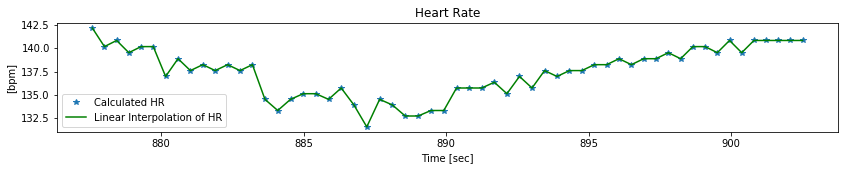

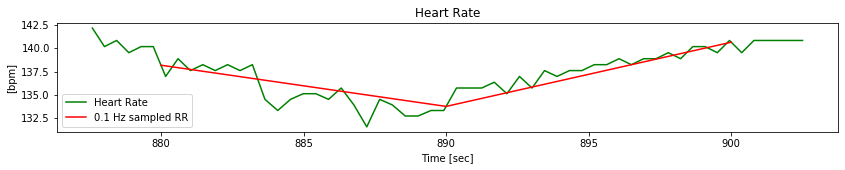

In [36]:
def hr(start, end):
    if start != 0:
        start = start - MARGIN
    end = end + MARGIN
    ecg = []
    for filename in os.listdir('samples'):
        if "MDC_ECG_ELEC_POTL_II-500" in filename:
            with open('samples/'+ filename, 'r') as f:
                reader = csv.reader(f)
                for row in reader:
                    ecg.append(float(row[1]))

                ecg_small = np.array(ecg[start*500:end*500])            
                peaks,_=find_peaks(ecg_small, height=8270, distance=155) #60/(193*0.002)
                peaks_sec = (peaks + start*500) * 0.002
                time = np.arange(start, end, 0.002)

                plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
                plt.plot(time,ecg_small)
                plt.plot(peaks_sec, ecg_small[peaks], "x")
                plt.title('ECG')
                plt.xlabel('Time [sec]')
                plt.legend(['ECG', 'Peaks'], loc='lower left')
                plt.show()
                ecg = []

                diffs = np.diff(peaks_sec)
                peaks_sec = peaks_sec[:len(diffs)]+diffs/2
                hr = 60/diffs

                plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
                plt.plot(peaks_sec,hr, "*")
                plt.plot(peaks_sec,hr, color='g')
                plt.title('Heart Rate')
                plt.xlabel('Time [sec]')
                plt.ylabel('[bpm]')
                plt.legend(['Calculated HR', 'Linear Interpolation of HR'], loc='lower left')
                plt.show()
                
                
                hr_interp_func = interp1d(peaks_sec, hr)
                time = np.arange(start + MARGIN, end - MARGIN + 1/F, 1/F)

                plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
                plt.plot(peaks_sec,hr,color='g')
                #plt.plot(peaks_sec,hr, "*")
                plt.plot(time,hr_interp_func(time),color='r')
                plt.title('Heart Rate')
                plt.xlabel('Time [sec]')
                plt.ylabel('[bpm]')
                plt.legend(['Heart Rate', '0.1 Hz sampled RR'], loc='lower left')
                plt.show()
                
                return time, hr_interp_func(time)
for i in [44]:
    hr(i*20, (1+i)*20)


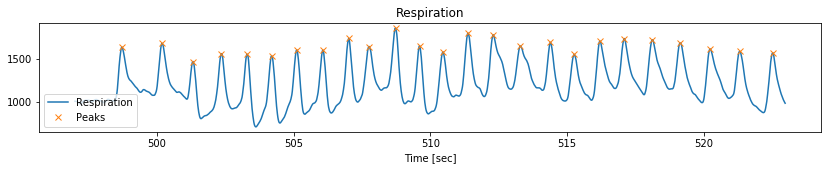

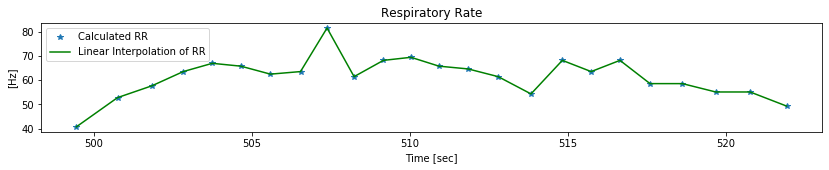

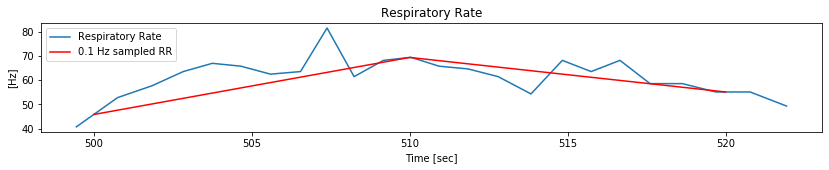

In [39]:
MARGIN = 3
def rr(start, end):
    if start != 0:
        start = start - MARGIN
    end = end + MARGIN
    resp = []
    for filename in os.listdir('samples'):
        if "MDC_RESP-62.5" in filename:
            with open('samples/'+filename, 'r') as f:
                reader = csv.reader(f)
                for row in reader:
                    resp.append(float(row[1]))

                resp_small = np.array(resp[(int)(start*62.5):(int)(end*62.5)])            
                peaks,_=find_peaks(resp_small, distance=31, height=1150, width=12, prominence=1)
                peaks_sec = (peaks + start*62.5) * 0.016
                time = np.arange(start, end, 0.016)
                
                plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
                plt.plot(time,resp_small)
                plt.plot(peaks_sec, resp_small[peaks], "x")
                plt.title('Respiration')
                plt.xlabel('Time [sec]')
                plt.legend(['Respiration', 'Peaks'], loc='lower left')
                plt.show()

                diffs = np.diff(peaks_sec)
                peaks_sec = peaks_sec[:len(diffs)]+diffs/2
                rr = 60/diffs

                resp = []
                
                plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
                plt.plot(peaks_sec,rr, "*")
                plt.plot(peaks_sec,rr, color='g')
                plt.title('Respiratory Rate')
                plt.xlabel('Time [sec]')
                plt.ylabel('[Hz]')
                plt.legend(['Calculated RR', 'Linear Interpolation of RR'], loc='upper left')
                plt.show()
                
                rr_interp_func = interp1d(peaks_sec, rr)
                time = np.arange(start + MARGIN, end - MARGIN + 1/F, 1/F)

                plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
                plt.plot(peaks_sec,rr)
                plt.plot(time,rr_interp_func(time),color='r')
                plt.title('Respiratory Rate')
                plt.xlabel('Time [sec]')
                plt.ylabel('[Hz]')
                plt.legend(['Respiratory Rate', '0.1 Hz sampled RR'], loc='upper left')
                plt.show()
                
                return time, rr_interp_func(time)
for i in [25]:
    rr(i*20, (1+i)*20)
    